<a href="https://colab.research.google.com/github/RareDiseaseData/Meta-analysis-data/blob/main/Outliers_normalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Mcgill/Hyl_Patient_data.csv')
dataset

,ID,Author,Year,Title,Cell1,Cell2,Age,Sex,Type,n,...,Method,Control vs patient vs aggregate,Measurement,%hydroxylysine_ind,%hydroxylysine_per_n1,%hydoxylation_per_n2,STD_n1,STD_n2,STD simulated from regression,STD combined
0,6,"Bleckmann, H.;Kresse, H.;Wollensak, J.;Buddeck...",1971,[Glycosaminoglycan and collagen analyses in os...,2,2,2,1,9,1.0,...,1,1,1,0.465116,NaN,NaN,NaN,NaN,0.093500,NaN
1,8,"Eastoe, J. E.;Martens, P.;Thomas, N. R.",1973,The amino-acid composition of human hard tissu...,2,3,1,1,2,1.0,...,2,1,1,0.219020,NaN,NaN,NaN,NaN,0.083326,NaN
2,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1977,Osteogenesis imperfecta congenita: evidence fo...,1,1,1,2,2,3.0,...,5,1,1,0.218750,0.314373,0.314373,0.00587,0.00587,NaN,NaN
3,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1977,Osteogenesis imperfecta congenita: evidence fo...,2,2,1,2,2,NaN,...,3,1,1,0.371429,NaN,NaN,NaN,NaN,0.041000,NaN
4,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1978,Osteogenesis imperfecta congenita: evidence fo...,2,3,1,2,2,NaN,...,3,1,1,0.352941,NaN,NaN,NaN,NaN,0.037900,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,5,1,1,0.370504,NaN,NaN,NaN,NaN,0.044100,NaN
65,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,5,1,1,0.412710,NaN,NaN,NaN,NaN,0.051200,NaN
66,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,5,1,1,0.423261,NaN,NaN,NaN,NaN,0.053000,NaN
67,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,5,1,1,0.425180,NaN,NaN,NaN,NaN,0.053300,NaN


In [ ]:
df1 = dataset.drop(['Author', 'Title', 'Year'], axis=1)
df1

,ID,Cell1,Cell2,Age,Sex,Type,n,n2,Contains std,type of comparaison,Method,Control vs patient vs aggregate,Measurement,%hydroxylysine_ind,%hydroxylysine_per_n1,%hydoxylation_per_n2,STD_n1,STD_n2,STD simulated from regression,STD combined
0,6,2,2,2,1,9,1.0,NaN,No,1,1,1,1,0.465116,NaN,NaN,NaN,NaN,0.093500,NaN
1,8,2,3,1,1,2,1.0,NaN,No,1,2,1,1,0.219020,NaN,NaN,NaN,NaN,0.083326,NaN
2,15,1,1,1,2,2,3.0,3.0,No,2,5,1,1,0.218750,0.314373,0.314373,0.00587,0.00587,NaN,NaN
3,15,2,2,1,2,2,NaN,NaN,No,2,3,1,1,0.371429,NaN,NaN,NaN,NaN,0.041000,NaN
4,15,2,3,1,2,2,NaN,NaN,No,2,3,1,1,0.352941,NaN,NaN,NaN,NaN,0.037900,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,158,1,1,5,3,4,NaN,NaN,No,3,5,1,1,0.370504,NaN,NaN,NaN,NaN,0.044100,NaN
65,158,1,1,5,3,4,NaN,NaN,No,3,5,1,1,0.412710,NaN,NaN,NaN,NaN,0.051200,NaN
66,158,1,1,5,3,4,NaN,NaN,No,3,5,1,1,0.423261,NaN,NaN,NaN,NaN,0.053000,NaN
67,158,1,1,5,3,4,NaN,NaN,No,3,5,1,1,0.425180,NaN,NaN,NaN,NaN,0.053300,NaN


In [ ]:
hydro_percentage = np.array(df1["%hydroxylysine_ind"])
hydro_percentage

array([0.46511628, 0.21902017, 0.21875   , 0.37142857, 0.35294118,
       0.294     , 0.28125   , 0.25207756, 0.25966851, 0.21787709,
       0.28370787, 0.303569  , 0.4       , 0.36585366, 0.22308   ,
       0.12990099, 0.2609901 , 0.14019802, 0.12118812, 0.13425743,
       0.27168317, 0.11445545, 0.15207921, 0.297     , 0.241     ,
       0.196     , 0.151     , 0.626     , 0.136     , 0.36      ,
       0.4059952 , 0.39160671, 0.32254197, 0.31103117, 0.29952038,
       0.26306954, 0.31390887, 0.32446043, 0.38009592, 0.40023981,
       0.43573142, 0.47026379, 0.50479616, 0.53932854, 0.22853717,
       0.24772182, 0.27841727, 0.30527578, 0.31678657, 0.36666667,
       0.38585132, 0.38872902, 0.45395684, 0.48369305, 0.49904077,
       0.50095923, 0.26019185, 0.29184652, 0.29952038, 0.31486811,
       0.34268585, 0.34940048, 0.35227818, 0.35515588, 0.3705036 ,
       0.41270983, 0.42326139, 0.42517986, 0.46930456])

In [ ]:
import numpy as np
from scipy import stats

q1 = np.percentile(hydro_percentage, 25)
q3 = np.percentile(hydro_percentage, 75)
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr
outliers = np.where((hydro_percentage < lower_fence) | (hydro_percentage > upper_fence))

print(hydro_percentage[outliers])

[0.626]


In [ ]:
!pip install outlier_utils


In [ ]:
import numpy as np
from outliers import smirnov_grubbs as grubbs

def grubbs_test(x):
   n = len(x)
   mean_x = np.mean(x)
   sd_x = np.std(x)
   numerator = max(abs(x-mean_x))
   g_calculated = numerator/sd_x
   print("Grubbs Calculated Value:",g_calculated)
   t_value_1 = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
   g_critical = ((n - 1) * np.sqrt(np.square(t_value_1))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value_1)))
   print("Grubbs Critical Value:",g_critical)
   if g_critical > g_calculated:
      print("We can see from the Grubbs test that the calculated value is less than the crucial value. Recognize the null hypothesis and draw the conclusion that there are no outliers\n")
   else:
      print("We see from the Grubbs test that the estimated value exceeds the critical value. Reject the null theory and draw the conclusion that there are outliers\n")
grubbs_test(hydro_percentage)
grubbs_test(hydro_percentage)

Grubbs Calculated Value: 2.7612271684076
Grubbs Critical Value: 3.25227734146401
We can see from the Grubbs test that the calculated value is less than the crucial value. Recognize the null hypothesis and draw the conclusion that there are no outliers

Grubbs Calculated Value: 2.7612271684076
Grubbs Critical Value: 3.25227734146401
We can see from the Grubbs test that the calculated value is less than the crucial value. Recognize the null hypothesis and draw the conclusion that there are no outliers



In [ ]:
df_dbscan = df1[[
    "Cell1",
    "Type",
    "Method",
    "%hydroxylysine_ind"
    ]]
df_dbscan.rename(columns = {'%hydroxylysine_ind':'hydroxylysine_ind'}, inplace = True)
df_dbscan

,Cell1,Type,Method,hydroxylysine_ind
0,2,9,1,0.465116
1,2,2,2,0.219020
2,1,2,5,0.218750
3,2,2,3,0.371429
4,2,2,3,0.352941
...,...,...,...,...
64,1,4,5,0.370504
65,1,4,5,0.412710
66,1,4,5,0.423261
67,1,4,5,0.425180


In [ ]:
df_dbscan.isna().sum()

Cell1                0
Type                 0
Method               0
hydroxylysine_ind    0
dtype: int64

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import os

from scipy.cluster.vq import kmeans
from scipy.cluster.vq import vq

import plotly.express as px

from sklearn.ensemble import IsolationForest


In [ ]:
df_dbscan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cell1              69 non-null     int64  
 1   Type               69 non-null     int64  
 2   Method             69 non-null     int64  
 3   hydroxylysine_ind  69 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 2.3 KB


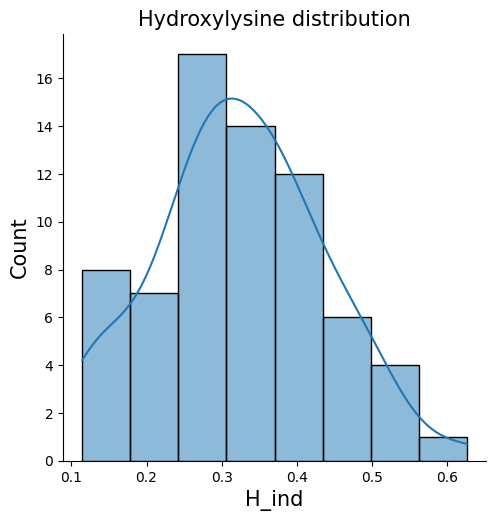

In [ ]:
sns.displot(df_dbscan['hydroxylysine_ind'],
           kde = True)

#label the axis
plt.xlabel("H_ind", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Hydroxylysine distribution", fontsize = 15)

plt.show()

In [ ]:
print(f"skewness: {df_dbscan['hydroxylysine_ind'].skew():.2f}")
print(f"Kurtosis: {df_dbscan['hydroxylysine_ind'].kurt():.2f}")

skewness: 0.14
Kurtosis: -0.12


Sk below 1 is normal and kurtosis do not show much for outliers

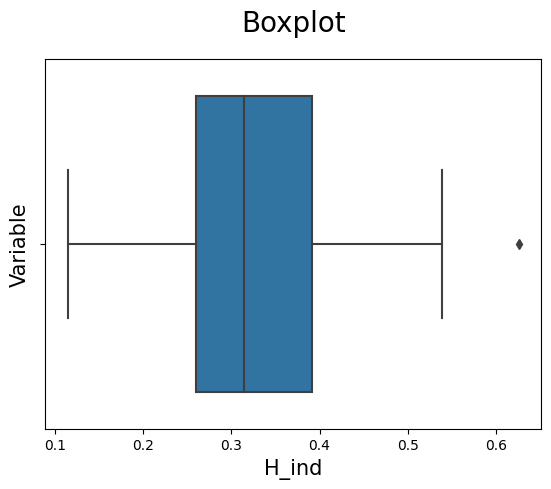

In [ ]:
#create the boxplot
ax = sns.boxplot(x = df_dbscan['hydroxylysine_ind'])

#add labels to the plot
ax.set_xlabel("H_ind", fontsize = 15)
ax.set_ylabel("Variable", fontsize = 15)
ax.set_title("Boxplot", fontsize =20, pad = 20)

plt.show()

In [ ]:
h_ind_lq = df_dbscan['hydroxylysine_ind'].quantile(0.25)
h_ind_uq = df_dbscan['hydroxylysine_ind'].quantile(0.75)
#extract the inter quartile range
h_ind_iqr = h_ind_uq - h_ind_lq

#get the upper and lower bounds
lower_bound = h_ind_lq - 1.5*h_ind_iqr
upper_bound = h_ind_uq + 1.5*h_ind_iqr

#extract values outside these bounds
IQR_outliers = df_dbscan[(df_dbscan.hydroxylysine_ind <= lower_bound) | (df_dbscan.hydroxylysine_ind >= upper_bound)]
IQR_outliers

,Cell1,Type,Method,hydroxylysine_ind
27,1,2,6,0.626


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_dbscan[['hydroxylysine_ind','Method']] = mms.fit_transform(df_dbscan[['hydroxylysine_ind','Method']])
df_dbscan.head()

,Cell1,Type,Method,hydroxylysine_ind
0,2,9,0.000000,0.685494
1,2,2,0.166667,0.204410
2,1,2,0.666667,0.203882
3,2,2,0.333333,0.502347
4,2,2,0.333333,0.466207


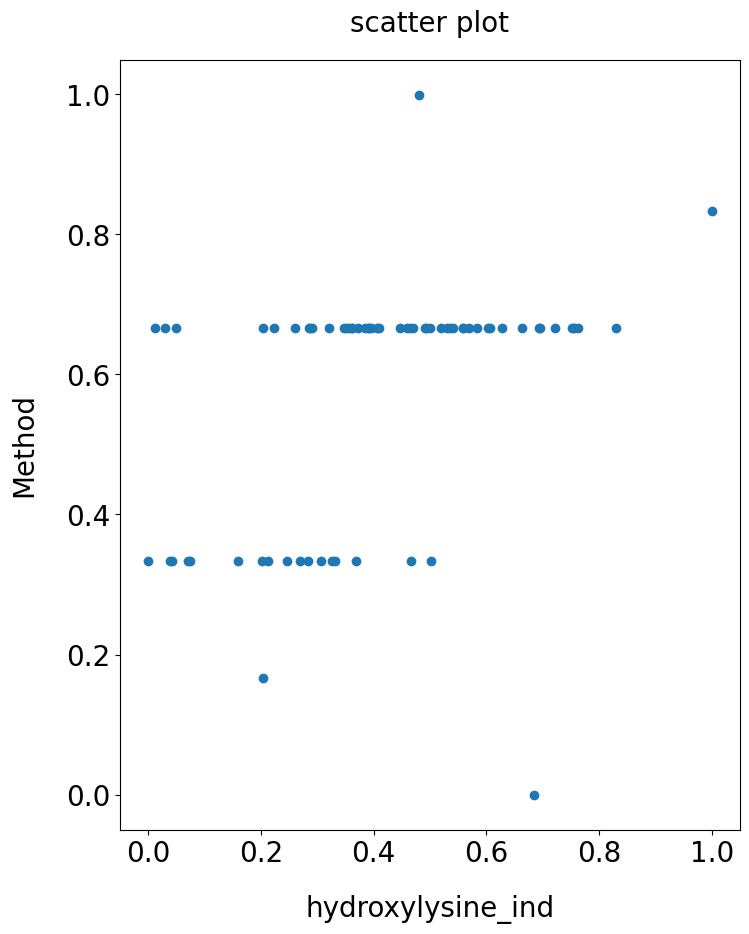

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (8,10))

#plot teh scatter plot
ax.scatter(df_dbscan['hydroxylysine_ind'], df_dbscan['Method'])

#add labels
ax.set_xlabel("hydroxylysine_ind", fontsize = 20, labelpad = 20)
ax.set_ylabel("Method", fontsize = 20, labelpad = 20)
ax.set_title("scatter plot", fontsize = 20, pad = 20)
#alter the tick parametes
ax.tick_params(axis = "both", labelsize = 20)

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_dbscan[['%hydroxylysine_ind','Method']])
distances, indices = nbrs.kneighbors(df_dbscan[['%hydroxylysine_ind','Method']])
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]


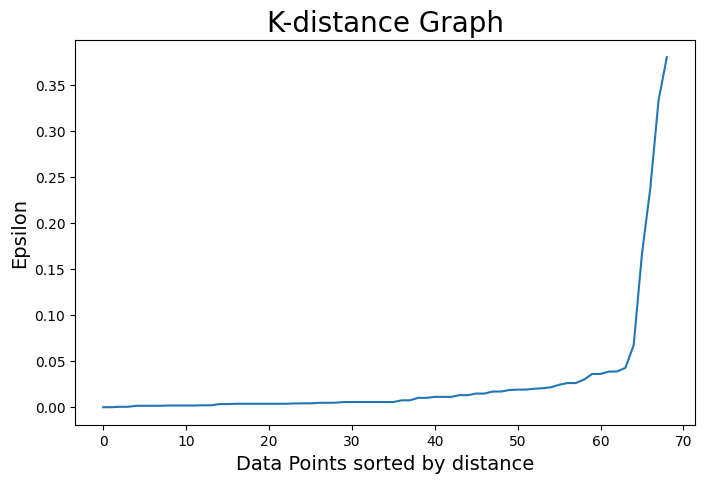

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

Text(0.5, 1.0, 'Outliers Detection using DBSCAN')

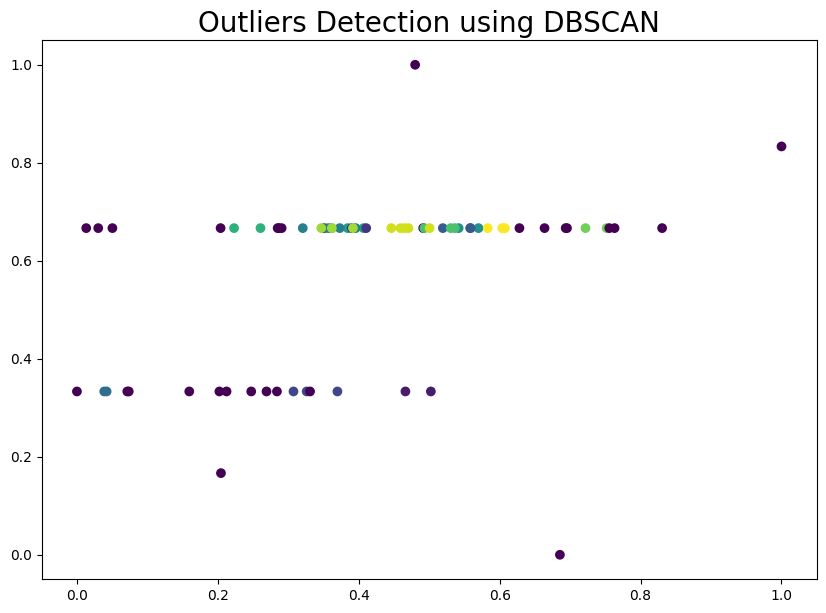

In [ ]:
model = DBSCAN(eps = 0.05, min_samples = 2).fit(df_dbscan)
colors = model.labels_
plt.figure(figsize=(10,7))
plt.scatter(df_dbscan['%hydroxylysine_ind'], df_dbscan['Method'], c = colors)
plt.title('Outliers Detection using DBSCAN',fontsize=20)


In [ ]:
from sklearn.cluster import DBSCAN


outlier_detection = DBSCAN(eps = 0.05, metric = "euclidean", min_samples = 10, n_jobs = -1)
#fit_predict the algorithm to the existing data
clusters = outlier_detection.fit_predict(df_dbscan[['hydroxylysine_ind', 'Method']])

#extract the labels from the algorithm
df_dbscan["dbscan_outliers"] = clusters
#label all others as inliers
df_dbscan["dbscan_outliers"] = df_dbscan["dbscan_outliers"].apply(lambda x: str(1) if x>-1 else str(-1))
#print the vaue counts
print(df_dbscan["dbscan_outliers"].value_counts())

-1    39
1     30
Name: dbscan_outliers, dtype: int64


In [ ]:
#this plot will be repeated so it is better to create a function
def scatter_plot(dataframe, x, y, color, title, hover_name):
    """Create a plotly express scatter plot with x and y values with a colour

    Input:
        dataframe: Dataframe containing columns for x, y, colour and hover_name data
        x: The column to go on the x axis
        y: Column name to go on the y axis
        color: Column name to specify colour
        title: Title for plot
        hover_name: column name for hover

    Returns:
        Scatter plot figure
    """
    #create the base scatter plot
    fig = px.scatter(dataframe, x = x, y=y,
                    color = color,
                     hover_name = hover_name)
    #set the layout conditions
    fig.update_layout(title = title,
                     title_x = 0.5)
    #show the figure
    fig.show()

scatter_plot(df_dbscan, "hydroxylysine_ind", "Method", "dbscan_outliers",
             "DBScan Outlier Detection",
            "hydroxylysine_ind")